In [1]:
import keras
import numpy as np
import os, shutil

Using TensorFlow backend.


In [2]:
from keras.models import load_model
model = load_model('cats_and_dogs.small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [60]:
from keras.preprocessing import image
img_path= '/mnt/data/ppaudyal/cats_and_dogs_small/test/cats/1050.jpg'
img = image.load_img(img_path, target_size=(150, 150)) #does this auto upscale?
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) #same as np.reshape with 1 since evaluate will expect num_samples as shape[0]
img_tensor /= 255.

In [61]:
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(150, 150)) #does this auto upscale?
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) #same as np.reshape with 1 since evaluate will expect num_samples as shape[0]
img_tensor /= 255.


In [94]:
img_tensor.shape

(1, 150, 150, 3)

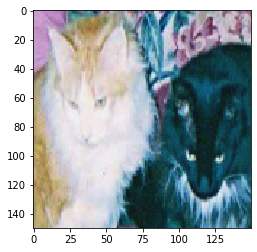

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.imshow(img_tensor[0]) #the first dimension is samples dimension
plt.show()

In [95]:
#using keras class models to do some magic

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) #getting a submodel out of the model

In [137]:
activations = activation_model.predict(img_tensor)

In [67]:
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
__________

In [68]:
print(activations[0].shape) #first layer activation

(1, 148, 148, 32)


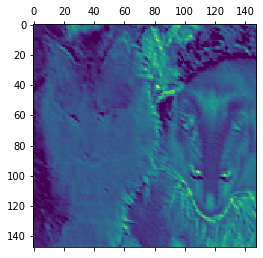

In [103]:
plt.matshow(activations[0][0, :, :, 8])

In [85]:
len(model.layers)

11

<Figure size 432x288 with 0 Axes>

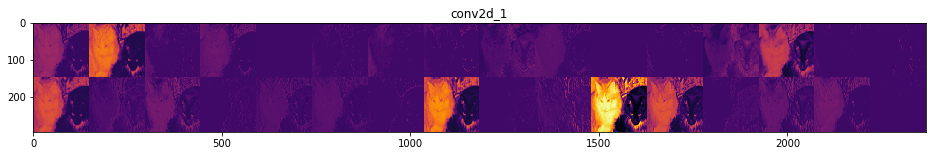

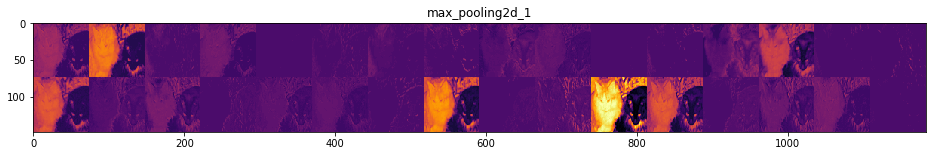

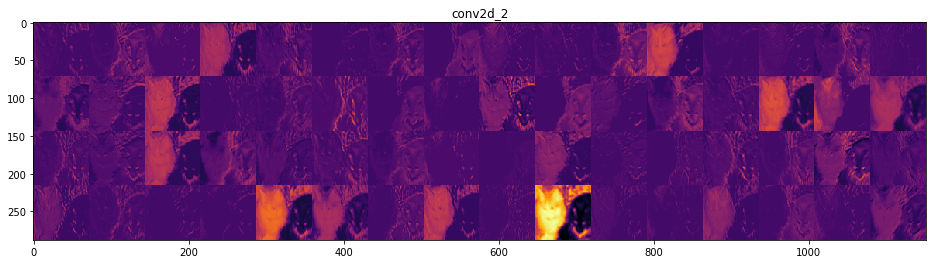

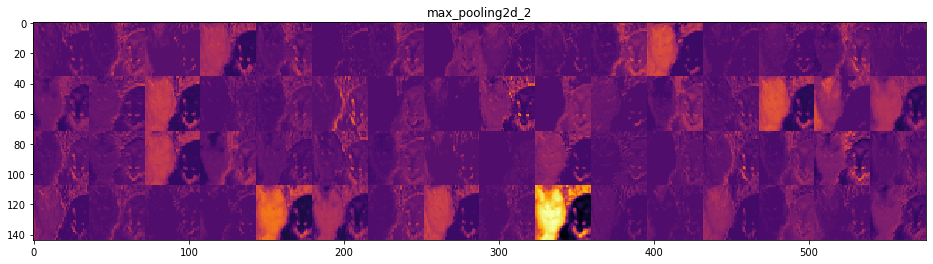

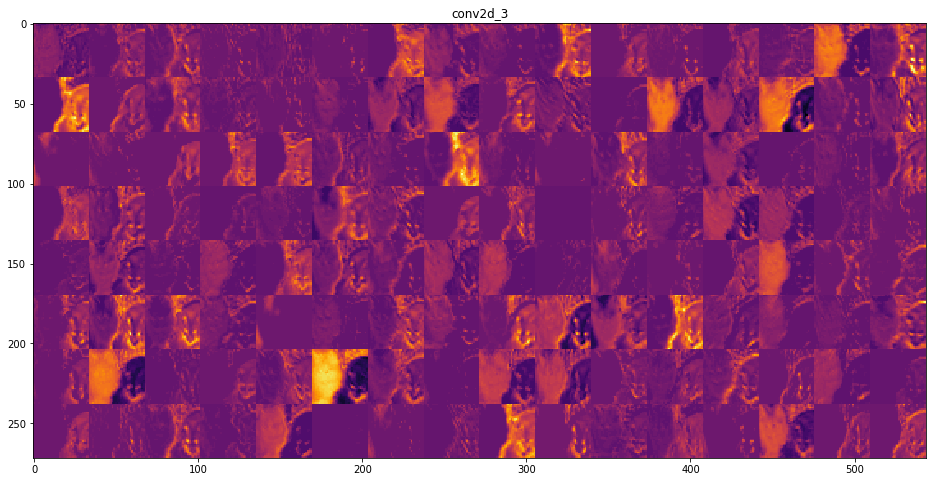

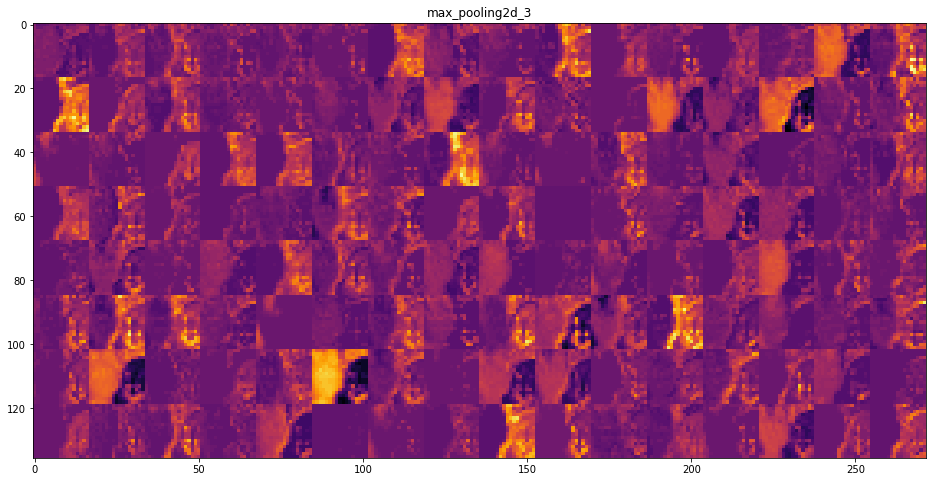

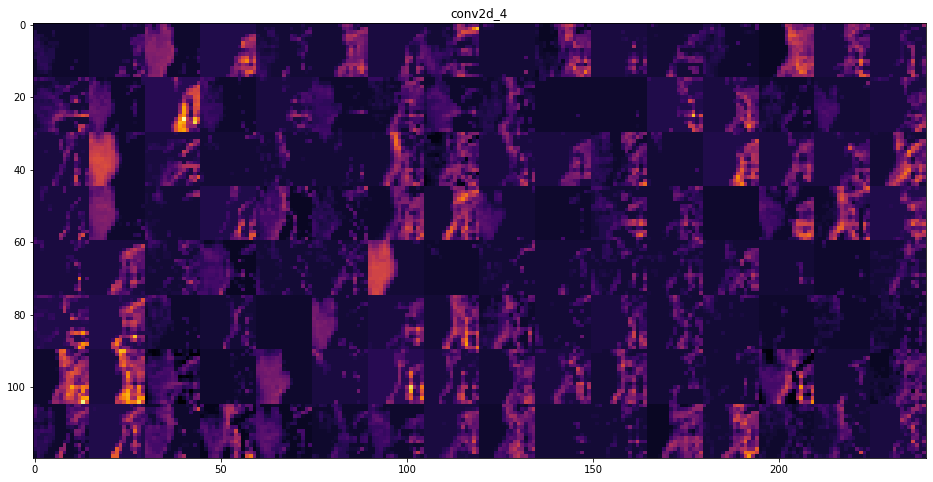

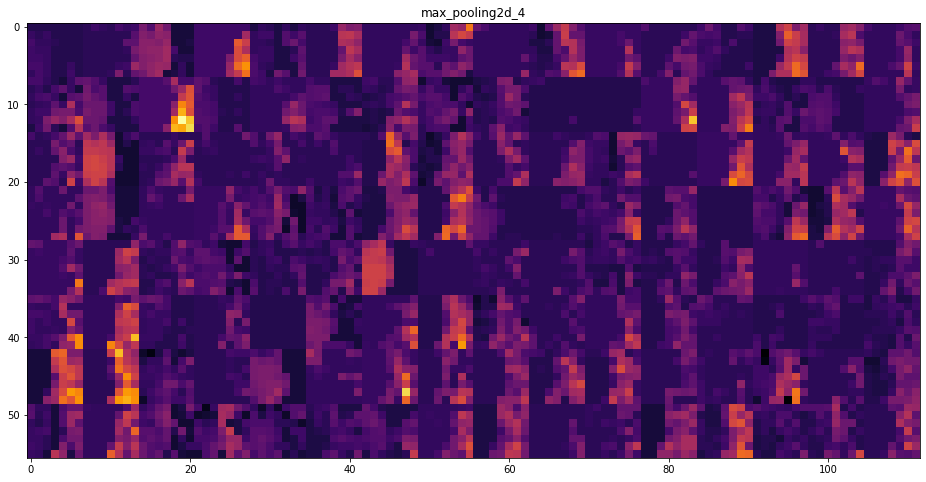

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import models

layer_names=[]

for layer in model.layers:
    layer_names.append(layer.name)

images_per_row = 16
plt.clf()

activations = activation_model.predict(img_tensor)

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] #number of features or channels 
    size = layer_activation.shape[1] #the feature maps are square images eg. [1, size, size, channels]
    
    n_cols = n_features // images_per_row #number of columns 
    display_grid = np.zeros((size*n_cols, size*images_per_row)) #possibly huge image to aggregate every activation ever
    
    for col in range(n_cols):
        for row in range(images_per_row):
            #print(col, row)
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image += channel_image.std()
            channel_image *= 64
            channel_image += 128 
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                        row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                       scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='inferno')
    

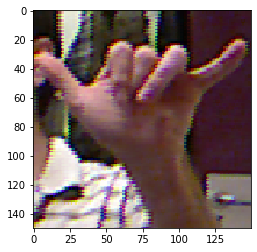

In [26]:
plt.imshow(img_tensor[0]) #the first dimension is samples dimension
plt.show()

In [2]:
from keras.models import load_model
model = load_model('../asl_handshapes/asl_handshape_scratch_4_06050219.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

<Figure size 432x288 with 0 Axes>

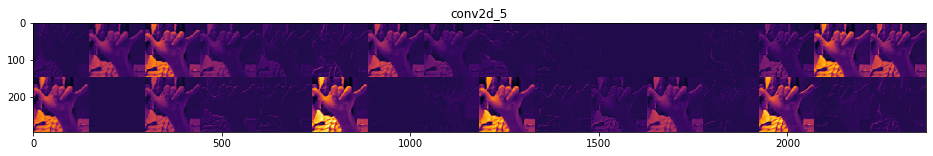

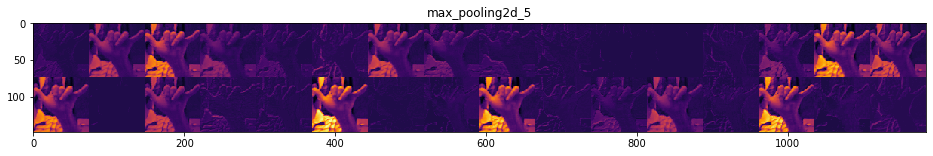

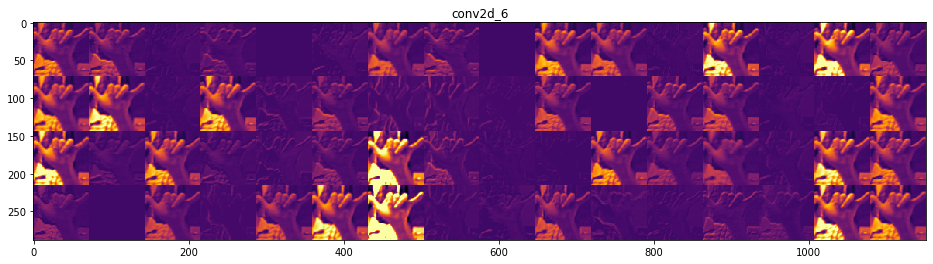

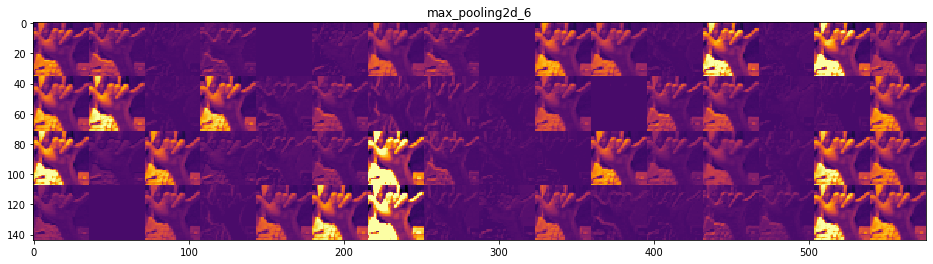

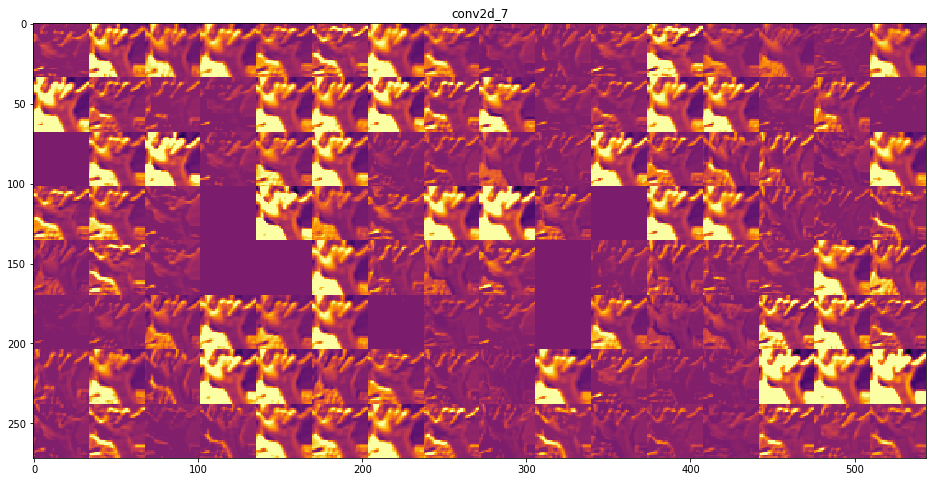

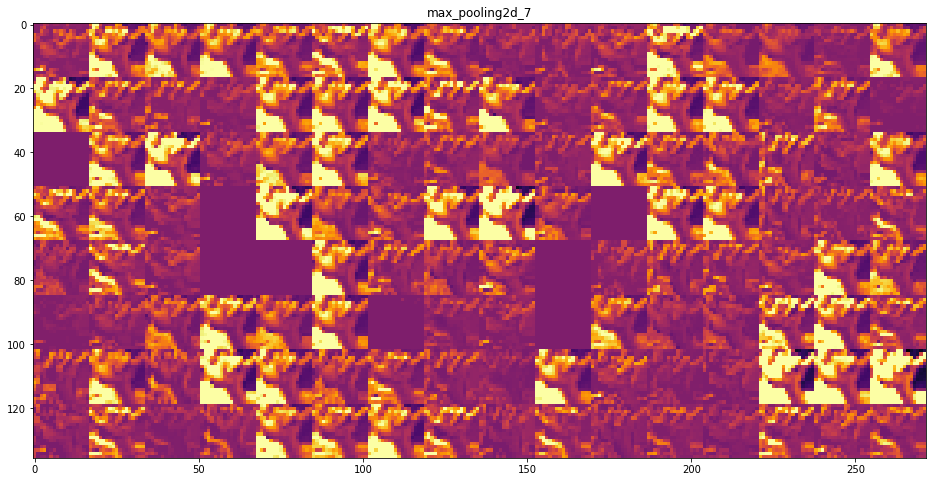

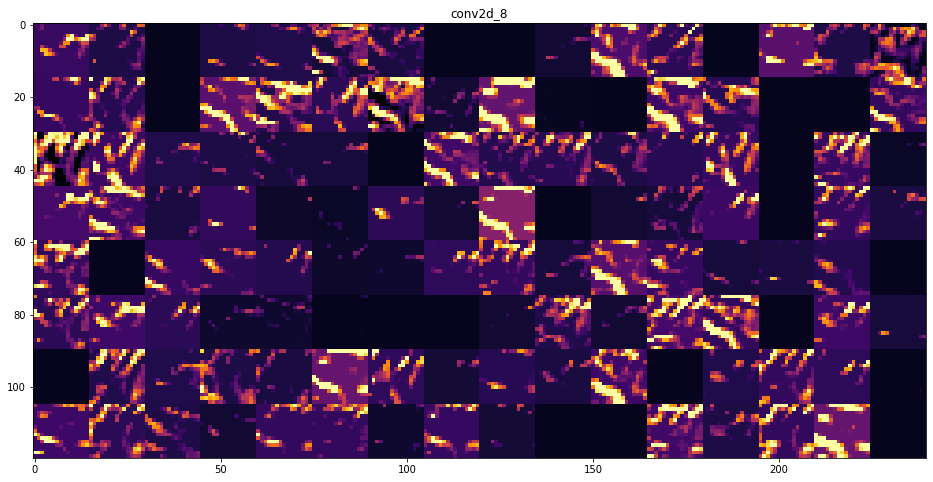

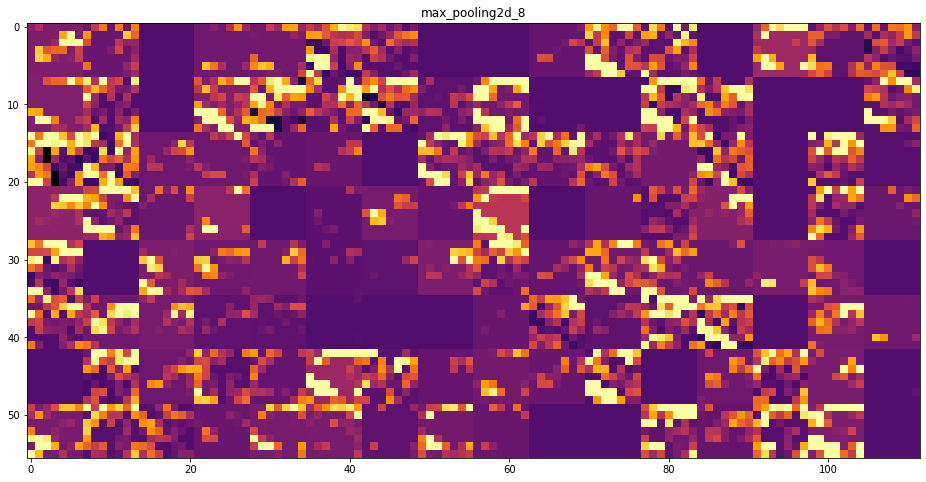

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import models
from keras.preprocessing import image

layer_names=[]

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) #getting a submodel out of the model

for layer in model.layers:
    layer_names.append(layer.name)

images_per_row = 16
plt.clf()


img_path= '/mnt/data/ppaudyal/handshape_color/A/y/color_24_0198.png'
img = image.load_img(img_path, target_size=(150, 150)) #does this auto upscale?
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) #same as np.reshape with 1 since evaluate will expect num_samples as shape[0]
img_tensor /= 255.

activations = activation_model.predict(img_tensor)

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] #number of features or channels 
    size = layer_activation.shape[1] #the feature maps are square images eg. [1, size, size, channels]
    
    n_cols = n_features // images_per_row #number of columns 
    display_grid = np.zeros((size*n_cols, size*images_per_row)) #possibly huge image to aggregate every activation ever
    
    for col in range(n_cols):
        for row in range(images_per_row):
            #print(col, row)
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image += channel_image.std()
            channel_image *= 64
            channel_image += 128 
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                        row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                       scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='inferno')